In [ ]:
#hide
#default_exp signal_processing

# Signal Processing Functions

In [ ]:
from scipy.signal import find_peaks, savgol_filter
#export
def find_peaks_clean(signal, sv_window: int = 301, sv_polyorder: int = 1, peak_prominence: float = 0.03):
    smoothed = savgol_filter(signal, sv_window, sv_polyorder)
    peaks, _ = find_peaks(smoothed, prominence=peak_prominence)
    return peaks

In [ ]:
import pandas as pd
battery_perf = pd.read_csv('../data/2020-4.csv')
battery_perf = battery_perf.loc[0:10000, :]
battery_perf.head()

,timestamp,current,voltage,temperature
0,1585699584,-0.045,3.990,25.6
1,1585699585,-0.407,3.988,25.6
2,1585699586,-0.925,3.986,25.6
3,1585699587,-2.174,3.981,25.6
4,1585699588,-1.829,3.980,25.6


In [ ]:
peaks = find_peaks_clean(battery_perf.voltage)
peaks = battery_perf.loc[peaks, :]
peaks.head()

,timestamp,current,voltage,temperature
3649,1585703233,8.994,3.991,25.8
7060,1585706644,8.873,4.033,25.7


<AxesSubplot:xlabel='timestamp', ylabel='voltage'>

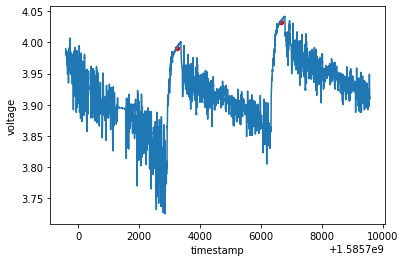

In [ ]:
import seaborn as sb
sb.lineplot(data=battery_perf, x="timestamp", y="voltage")
sb.scatterplot(data=peaks, x="timestamp", y="voltage", color='r')